# Step 1: Load and explore the dataset

In [124]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file

df = pd.read_csv('day.csv')

In [3]:
# Viewing the first few rows

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Getting the shape of the dataset

df.shape

(730, 16)

In [5]:
# Getting information about columns and their datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Descriptive Statistics

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Handling missing values
# Checking for missing values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Renaming a few columns to a clean format

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [9]:
# Checking if columns have been renamed

df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
#Checking columns

df.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
# Number of elements in dataframe

df.size

11680

In [12]:
# Dropping unwanted columns

# This column represents the record index and does not provide any meaningful information for analysis or modeling.
df.drop(['instant'], axis = 1, inplace = True)

# This column represents the date, which may not directly contribute since we have month and weekday column.
df.drop(['dteday'], axis = 1, inplace = True)

# Since the "cnt" column already represents the total count of rentals, including the individual counts of casual and registered users would introduce multicollinearity and potentially lead to overfitting
df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)

In [13]:
# Data preprocessing
# converting feature values into categorical string values

# Convert 'season' column
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df['season'] = df['season'].map(season_mapping)

# Convert 'weathersit' column
weather_mapping = {1: 'clear', 2: 'mist', 3: 'light snow', 4: 'heavy rain'}
df['weathersit'] = df['weathersit'].map(weather_mapping)

# Convert 'month' column
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df['month'] = df['month'].map(month_mapping)

# Convert 'weekday' column
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
df['weekday'] = df['weekday'].map(weekday_mapping)

In [14]:
# Checking to see if values have been converted to string

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,January,0,Monday,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# Getting information about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#  Step 2: Exploratory Data Analysis

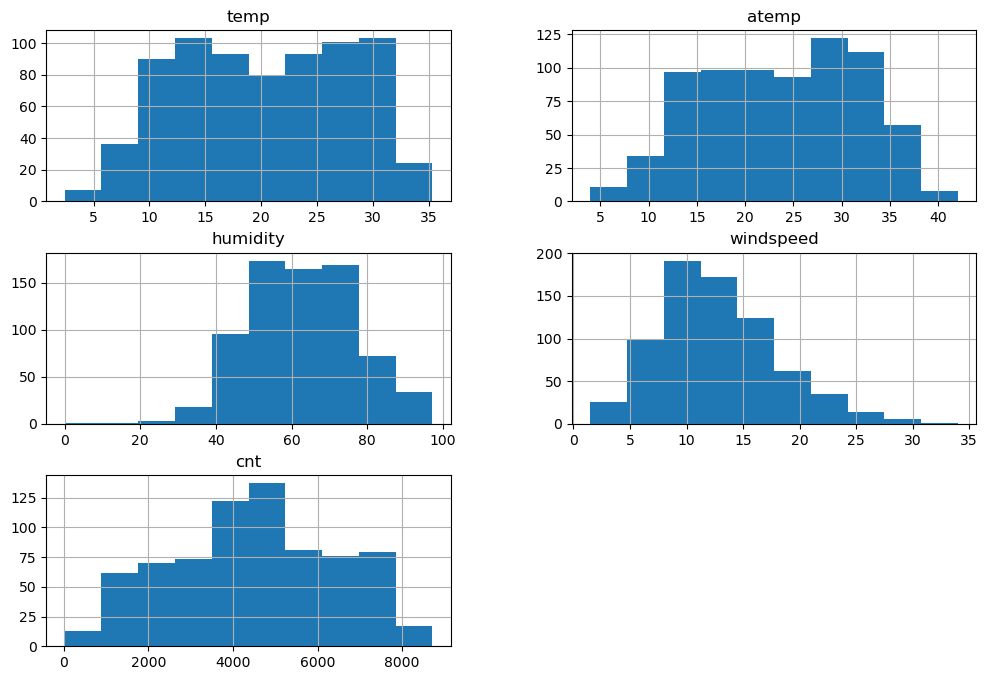

In [17]:
# Plot histogram of numeric variables
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']
df[numeric_cols].hist(bins=10, figsize=(12, 8))
plt.show()

In [ ]:
# Temperature: The temperature variables have a roughly normal distribution with a peak around the average temperature. This suggests that the majority of the recorded temperatures fall within a certain range, indicating a relatively consistent temperature pattern.

# Humidity: The humidity variable is slightly right-skewed, indicating that higher humidity levels are more frequently observed. The distribution is not symmetric, suggesting that there may be some variations in humidity levels.

# Windspeed: The windspeed variable shows a skewed distribution towards higher windspeed values. This indicates that lower windspeeds are more common, but there are instances of higher windspeeds as well.

# Bike Rentals(cnt): The distribution of the total bike rentals (cnt) is right-skewed, with a higher frequency of lower rental counts and a tail towards higher rental counts. This suggests that there are more instances of lower demand for bike rentals, but there are also some days with relatively high demand.

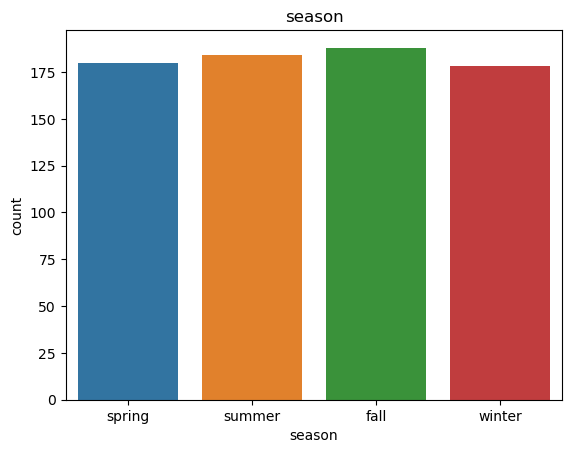

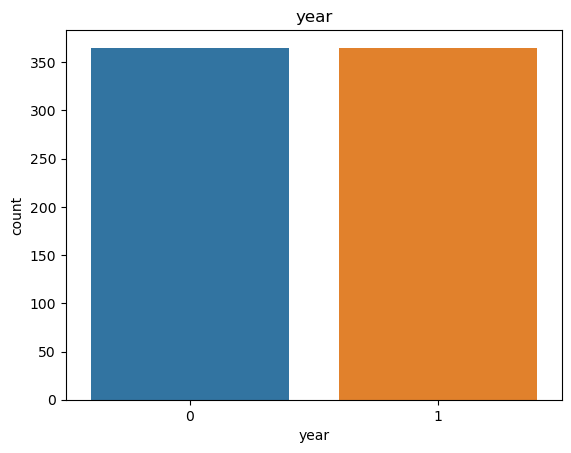

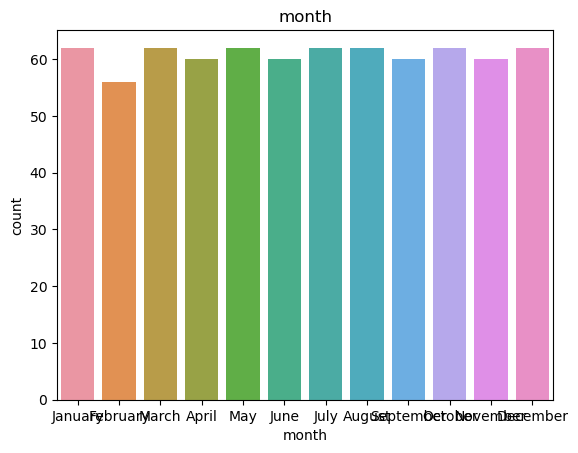

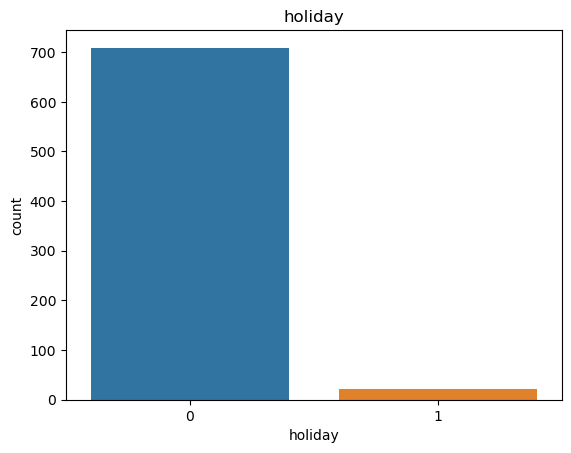

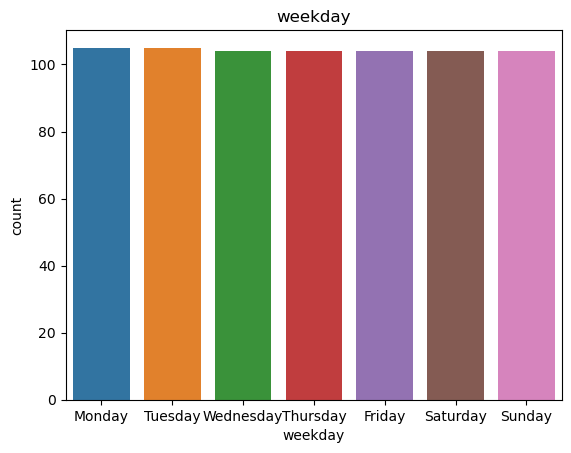

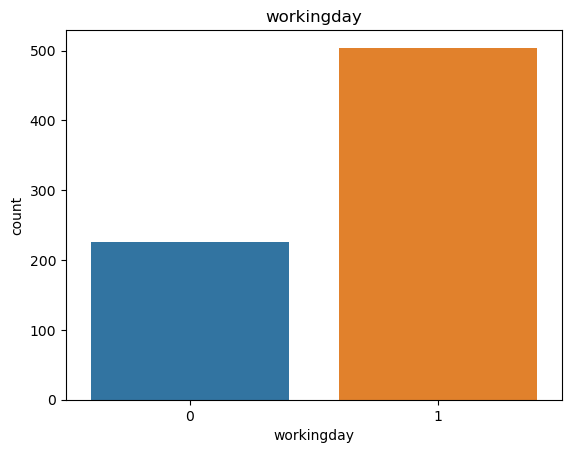

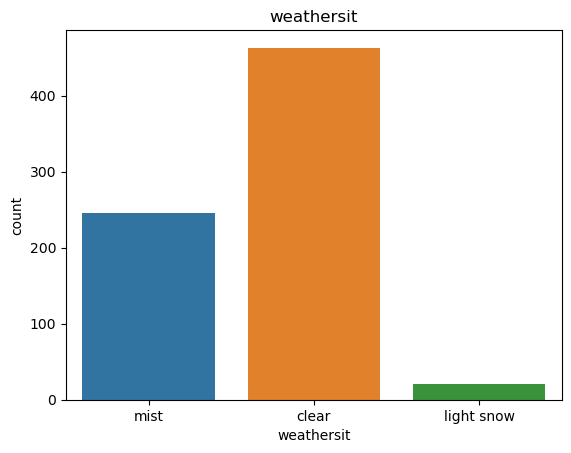

In [18]:
# Plot bar plot of categorical variables

categorical_cols = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.show()

In [ ]:
# Season: The bar plot shows the distribution of the seasons. We can observe that each season has a similar frequency, indicating a relatively balanced representation of the seasons in the dataset.

# Year: The bar plot displays the distribution of the years. We can see that the dataset includes data from two years, 2018 and 2019, with a roughly equal number of records for each year.

# Month: The bar plot represents the distribution of the months. We can observe the frequencies of bike rentals for each month. It appears that there are more records for the summer months (June, July, and August), suggesting a potential peak in bike rentals during the warmer months.

# Holiday: The bar plot illustrates whether a given day is a holiday or not. We can observe the frequency of rental counts for holidays and non-holidays. It seems that non-holiday days have a higher frequency, indicating that bike rentals are more common on regular days rather than holidays.

# Weekday: The bar plot shows the distribution of weekdays. We can observe the frequency of bike rentals for each day of the week. It appears that weekdays have higher rental counts compared to weekends, suggesting that bike rentals are more popular during weekdays, possibly due to commuting or work-related activities.

# Workingday: The bar plot represents whether a day is a working day or not. We can observe the frequency of rental counts for working days and non-working days. It seems that working days have a higher frequency, indicating that bike rentals are more common on regular working days.

# Weather Situation: The bar plot displays the distribution of different weather situations. We can observe the frequency of each weather category and its impact on bike rentals. It appears that weather situation 1 (clear, few clouds) has the highest frequency, suggesting that bike rentals are more prevalent during favorable weather conditions.

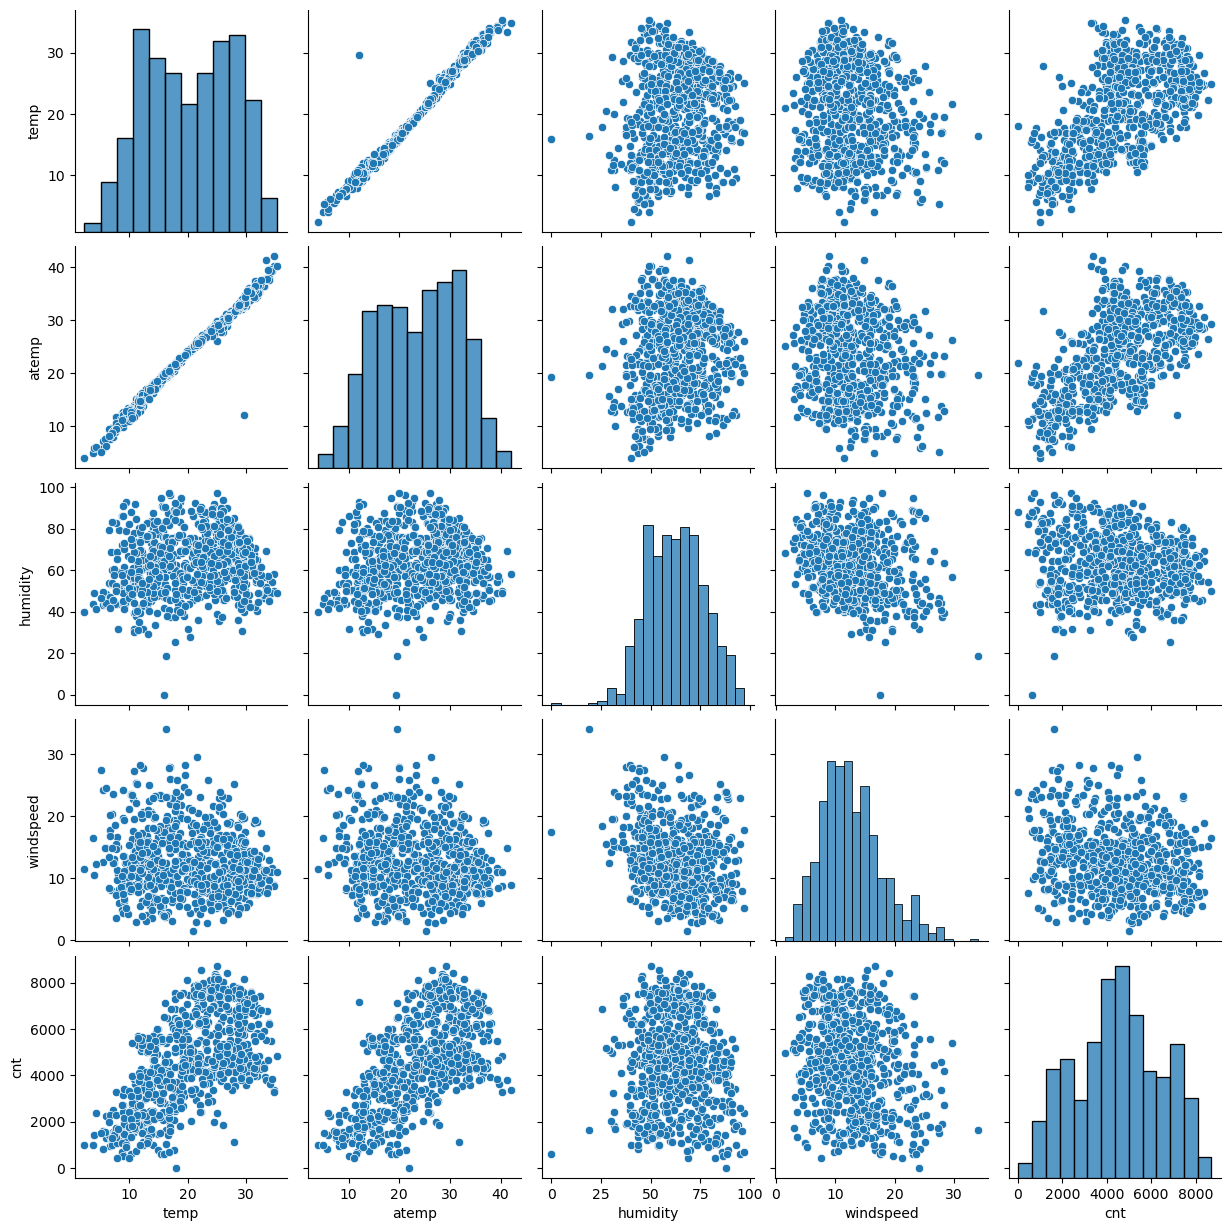

In [19]:
# Plot scatter plot of numeric variables

sns.pairplot(df[numeric_cols])
plt.show()

In [ ]:
# Temperature and Feeling Temperature: There is a positive linear relationship between temperature and feeling temperature, which is expected. As the temperature increases, the feeling temperature also tends to increase.

# Humidity and Bike Rentals: There doesn't seem to be a strong linear relationship between humidity and bike rentals. The data points are scattered, indicating that humidity alone may not be a significant factor in determining the number of bike rentals.

# Wind Speed and Bike Rentals: Similar to humidity, there is no strong linear relationship between wind speed and bike rentals. The data points are scattered, suggesting that wind speed alone may not have a direct impact on bike rental counts.

# Bike Rentals and Temperature: There is a positive correlation between bike rentals and temperature. As the temperature increases, the number of bike rentals tends to increase as well. This indicates that temperature is a significant factor in determining bike rental demand.

# Bike Rentals and Feeling Temperature: Similar to temperature, feeling temperature also shows a positive correlation with bike rentals. Higher feeling temperatures are associated with higher bike rental counts.

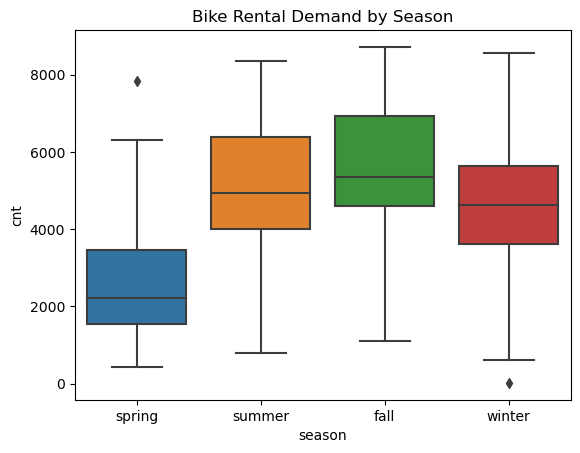

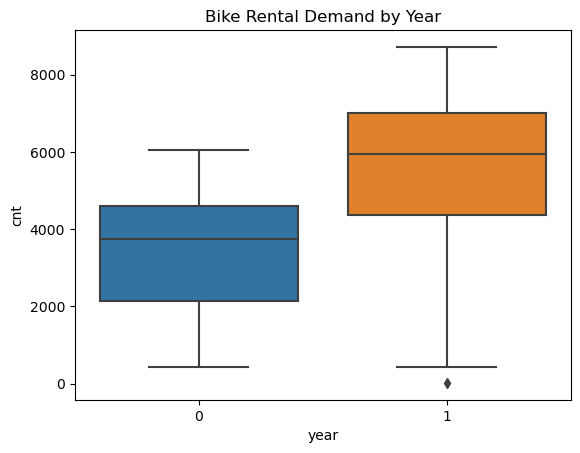

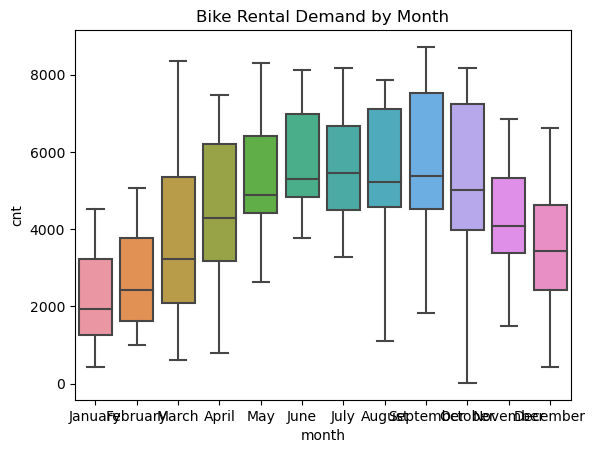

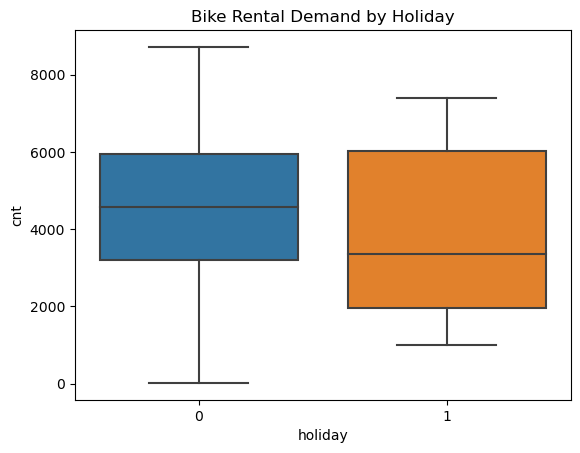

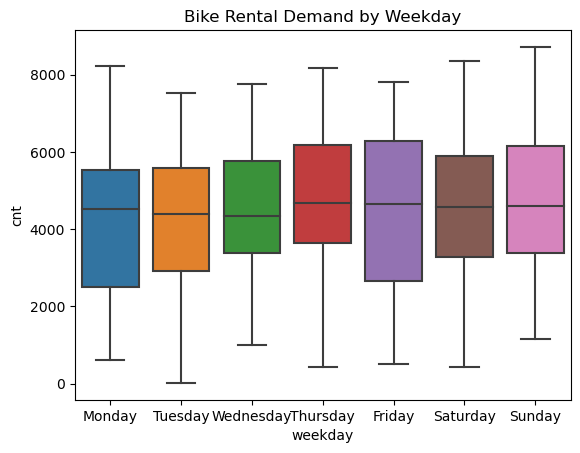

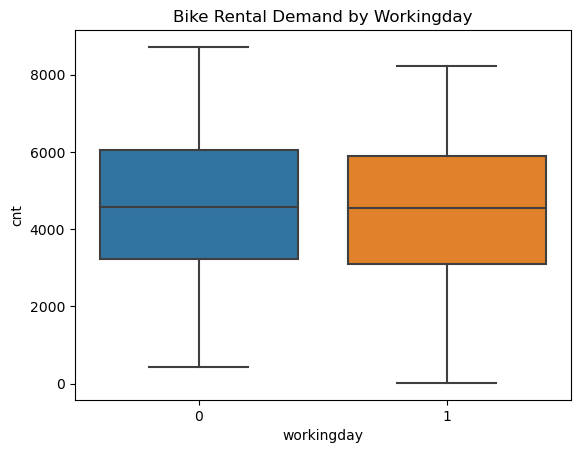

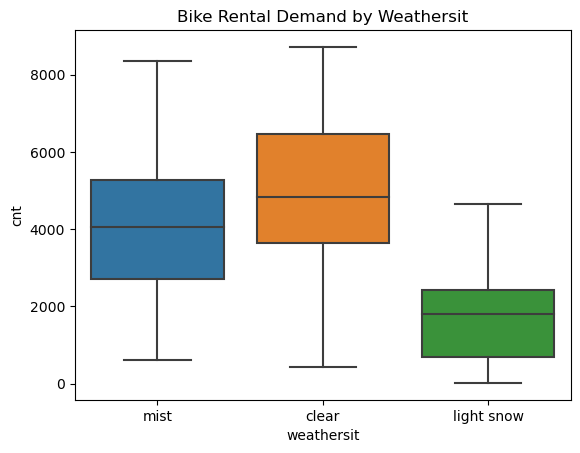

In [28]:
# Box plots for all categorical variables against the 'cnt' variable

categorical_cols = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols:
    sns.boxplot(x=col, y='cnt', data=df)
    plt.title(f'Bike Rental Demand by {col.capitalize()}')
    plt.show()

In [ ]:
# Season: The demand for bike rentals tends to be higher in seasons 2 (summer) and 3 (fall) compared to seasons 1 (spring) and 4 (winter). This suggests that weather and seasonal factors influence bike rental demand.

# Year: The demand for bike rentals is higher in the year 1 (2019) compared to year 0 (2018). This indicates that the demand for bike rentals is increasing over time, possibly due to the growing popularity of bike-sharing systems.

# Month: The demand for bike rentals varies across different months. It is generally higher in months 5 to 10 (May to October), indicating a seasonal pattern in bike rental demand.

# Holiday: Bike rental demand is slightly lower on holidays compared to non-holiday days. This could be due to different activities and travel patterns during holidays.

# Weekday: The demand for bike rentals is relatively higher on weekdays (values 1 to 5) compared to weekends (values 0 and 6). This suggests that bike rentals are more popular for commuting or daily transportation purposes.

# Workingday: The demand for bike rentals is higher on working days (workingday = 1) compared to non-working days (workingday = 0). This aligns with the observation from the 'weekday' variable, indicating that bike rentals are commonly used for commuting or work-related purposes.

# Weathersit: The demand for bike rentals is lower during weather situations 3 and 4, which involve light snow, rain, thunderstorm, and foggy conditions. Higher demand is observed during weather situations 1 and 2, which involve clear, partly cloudy, or misty conditions.

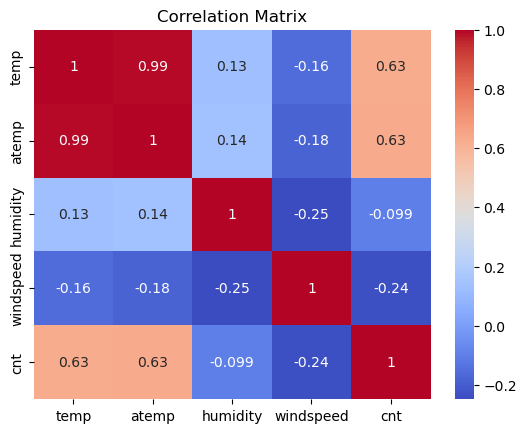

In [29]:
# Correlation matrix of numeric varibles

correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Temperature and feeling temperature have a strong positive correlation. This indicates that as the actual temperature increases, the perceived feeling temperature also tends to increase.

# The temperature variables have a moderate positive correlation with the bike rental demand. This suggests that higher temperatures are associated with higher demand for bike rentals.

# Humidity and windspeed have weak negative correlations with bike rental demand. This implies that higher humidity and stronger windspeeds may have a slight negative impact on bike rental demand.

# There is a relatively strong positive correlation between feeling temperature and bike rental demand. This indicates that the perceived feeling temperature has a significant influence on bike rental demand.

#  Step 3: Preparing the Dataset

In [30]:
# Creating dummy variables for categorical columns

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [33]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,January,0,Monday,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [34]:
# Concatenating the dummy variables with the original dataset

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [35]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,light snow,mist,spring,summer,winter
0,spring,0,January,0,Monday,1,mist,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,January,0,Tuesday,1,mist,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,January,0,Wednesday,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,January,0,Thursday,1,clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,January,0,Friday,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [37]:
# check the column information of new dataframe

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  August      730 non-null    uint8  
 13  December    730 non-null    uint8  
 14  February    730 non-null    uint8  
 15  January     730 non-null    uint8  
 16  July        730 non-null    uint8  
 17  June        730 non-null    uint8  
 18  March       730 non-null    uint8  
 19  May         730 non-null    u

In [38]:
# Drop the original categorical columns from the processed dataset

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [39]:
# Checking the head of the new dataframe

df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,August,December,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,light snow,mist,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
# Checking the shape of the new dataframe

df_new.shape

(730, 30)

In [41]:
# Getting information about the columns in the new dataframe

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   August      730 non-null    uint8  
 9   December    730 non-null    uint8  
 10  February    730 non-null    uint8  
 11  January     730 non-null    uint8  
 12  July        730 non-null    uint8  
 13  June        730 non-null    uint8  
 14  March       730 non-null    uint8  
 15  May         730 non-null    uint8  
 16  November    730 non-null    uint8  
 17  October     730 non-null    uint8  
 18  September   730 non-null    uint8  
 19  Monday      730 non-null    u

# Step 4: Splitting the data into training and testing sets

In [42]:
# Setting the random seed value to 0 for NumPy's random number generator
# splitting the DataFrame df_new into two sets: df_train and df_test

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [43]:
# Check the shape of training

df_train.shape

(510, 30)

In [44]:
# Check the shape of test

df_test.shape

(220, 30)

In [45]:
# Normalize the range of the features and ensuring they are on a consistent scale

scaler = MinMaxScaler()

In [46]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,August,December,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,light snow,mist,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,1,0,0,0,0,1,0,1,0


In [47]:
# Define the numerical variables
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

# Fit and transform the numerical features of the training set
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [48]:
# verifying the head after scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,August,December,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,light snow,mist,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,0,1,0,1,0


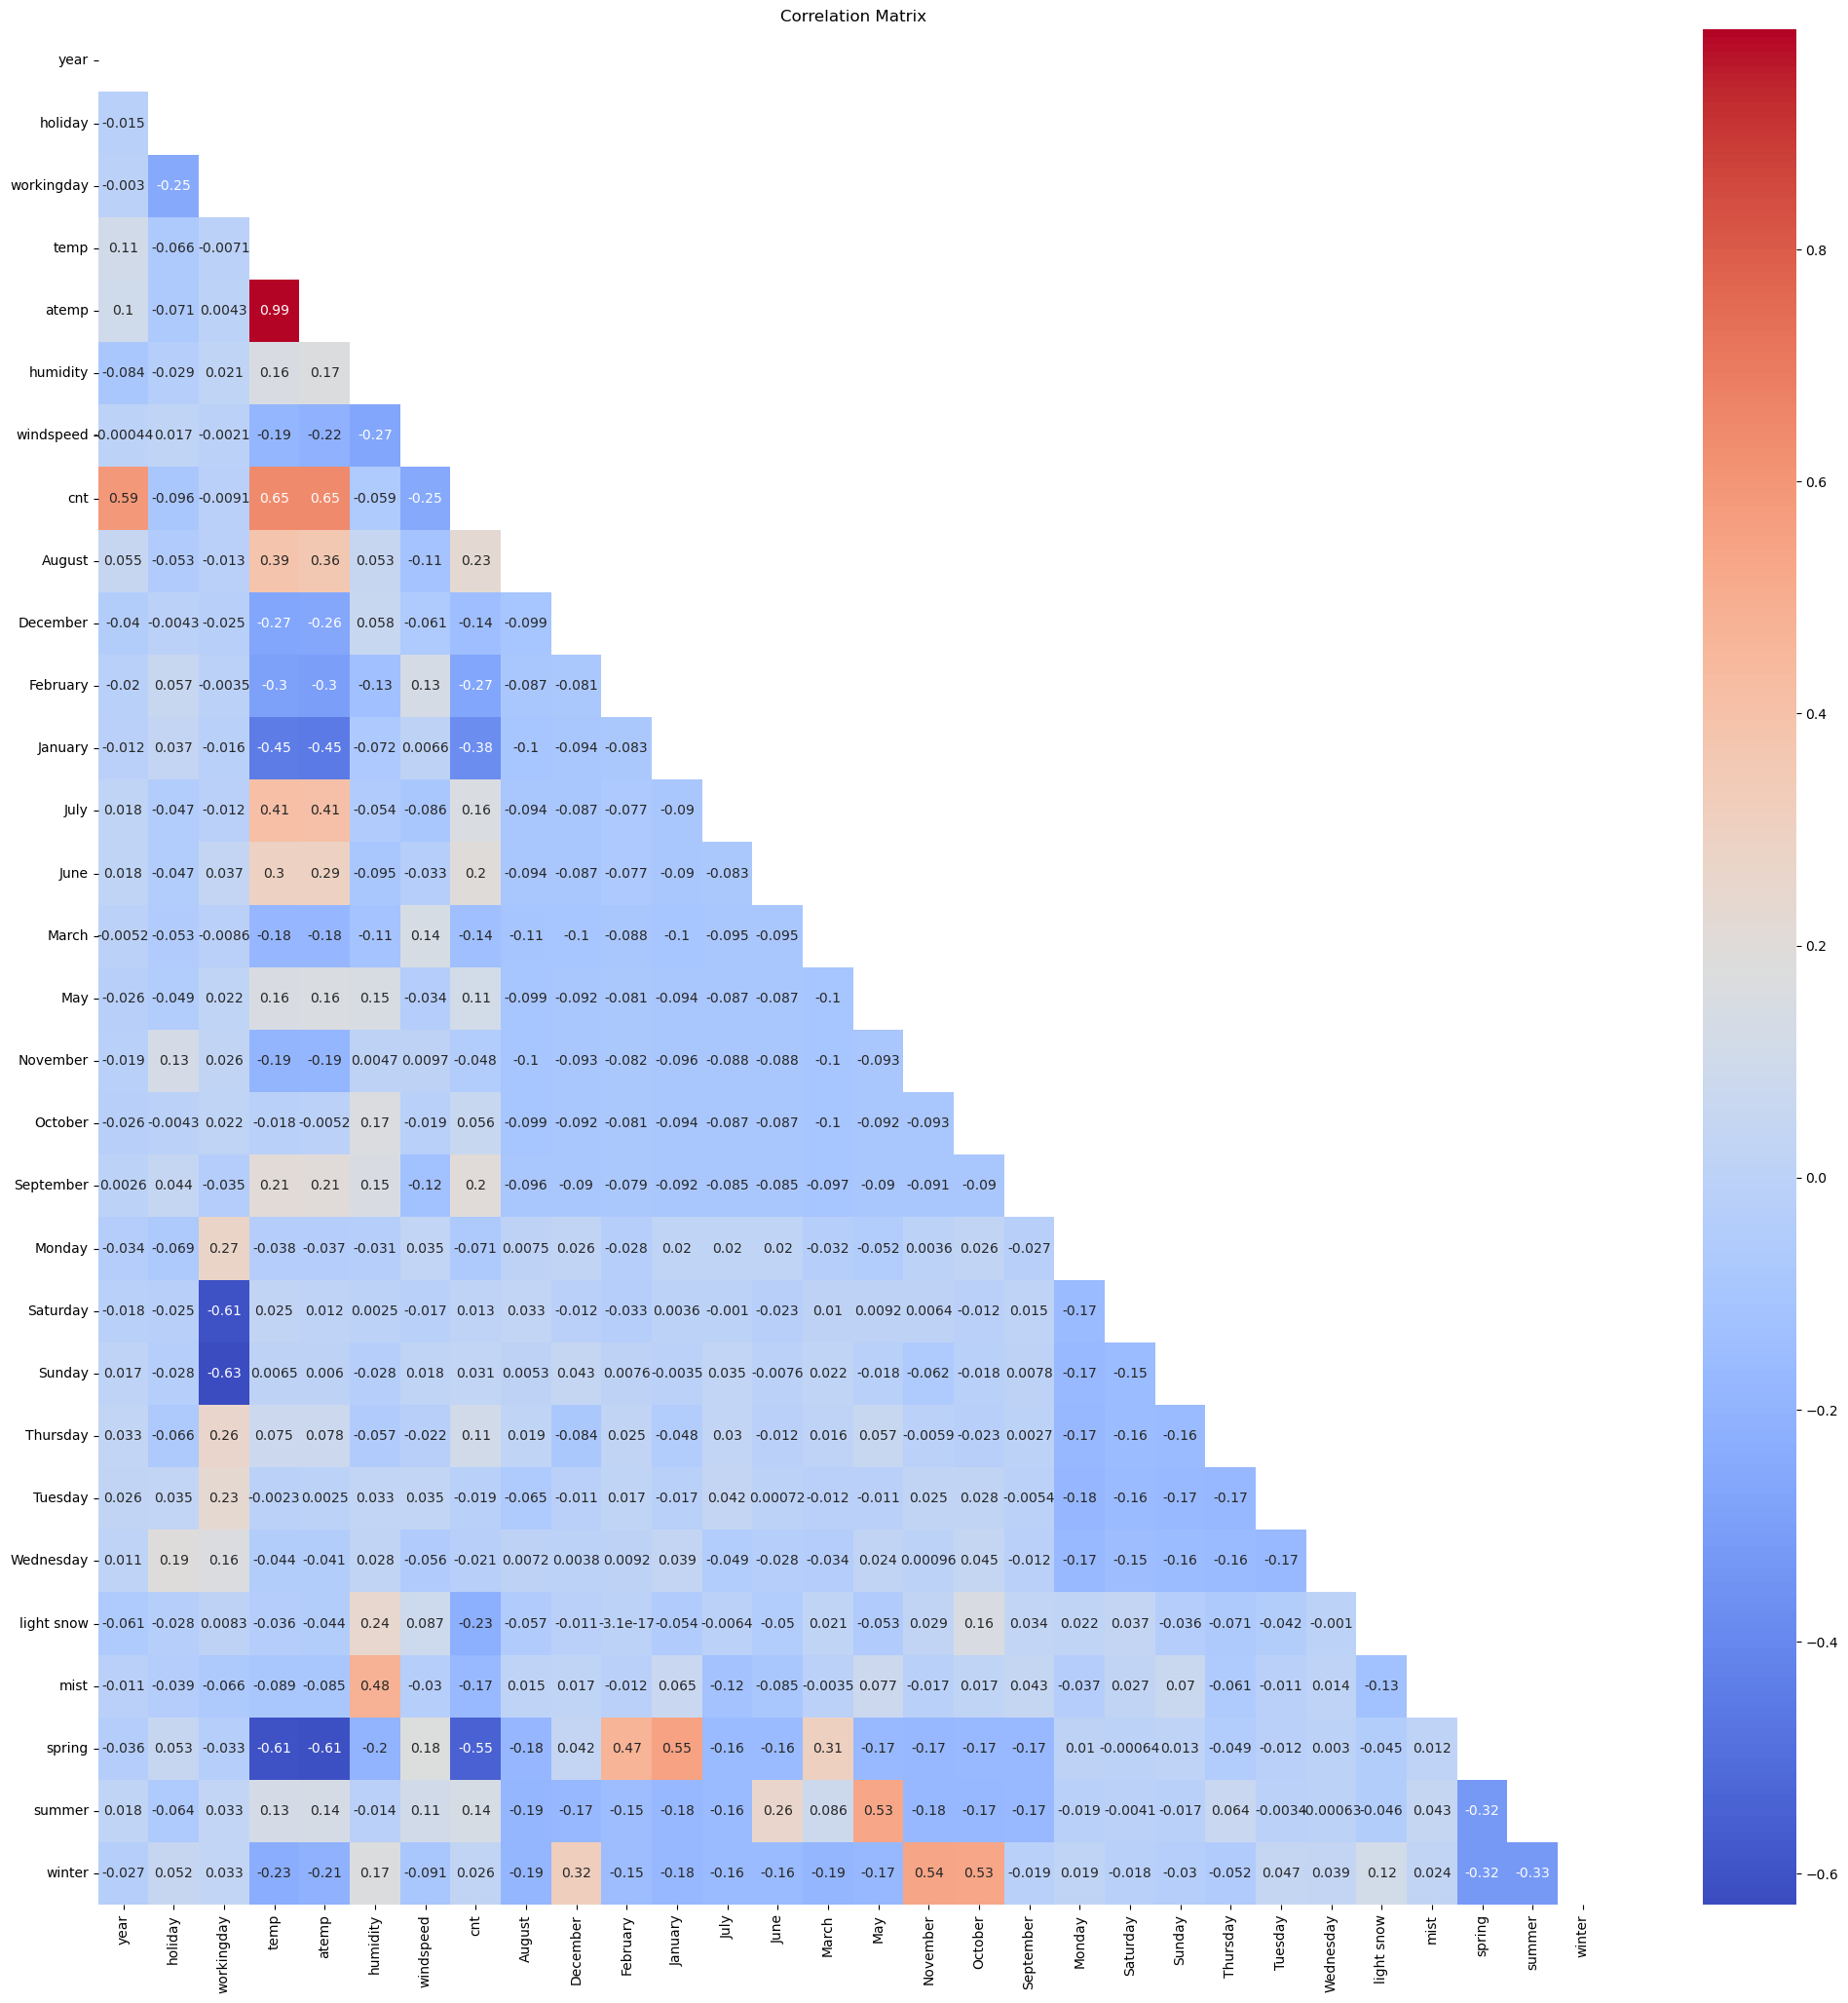

In [61]:
# Checking the correlation coefficients

plt.figure(figsize = (25,25))
correlation_matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', mask = correlation_matrix)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# The strongest positive correlation in the heatmap appears to be between "temp" and "atemp".
# The correlation between "temp" and "cnt" is also relatively strong, indicating that temperature has a moderate impact on the bike rental demand.
# The variables "year" and "cnt" show a moderate positive correlation, suggesting an increasing trend in bike rental counts over the years.
# The variables "season" and "month" show positive correlations with "cnt," suggesting that certain seasons and months experience higher bike rental demands.

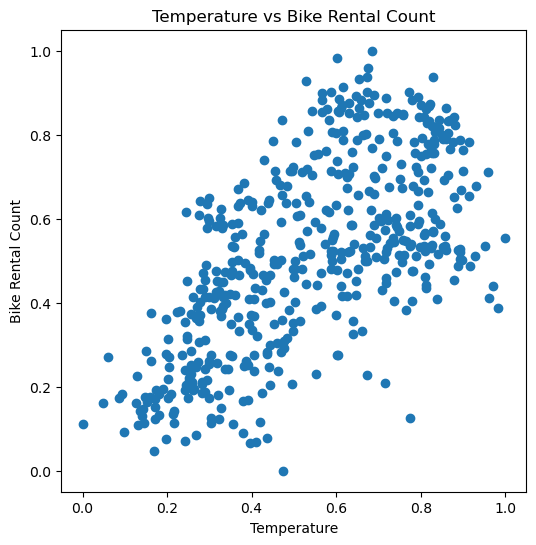

In [62]:
#  Relationship between temperature and bike rental count in the training dataset

plt.figure(figsize=(6, 6))
plt.plot(df_train['temp'], df_train['cnt'], 'o')
plt.xlabel('Temperature')
plt.ylabel('Bike Rental Count')
plt.title('Temperature vs Bike Rental Count')
plt.show()

In [63]:
# Separate the target variable 'cnt' from the training dataset

y_train = df_train.pop('cnt')
X_train = df_train

In [64]:
# Create the Linear Regression model
lm = LinearRegression()

# Perform Recursive Feature Elimination
rfe = RFE(estimator=lm, n_features_to_select=15).fit(X_train, y_train)

In [68]:
# Retrieve the feature names, selection status, and rankings from RFE and create a list of tuples

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('August', False, 10),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('March', False, 15),
 ('May', False, 9),
 ('November', True, 1),
 ('October', False, 13),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thursday', False, 14),
 ('Tuesday', False, 7),
 ('Wednesday', False, 11),
 ('light snow', True, 1),
 ('mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [69]:
# selects the column names from X_train that have been identified as selected features by the RFE

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'December',
       'January', 'July', 'November', 'September', 'light snow', 'mist',
       'spring', 'summer', 'winter'],
      dtype='object')


In [70]:
# Not selected as important features by the RFE process

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'August', 'February', 'June', 'March', 'May',
       'October', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [75]:
# Calculate the Variance Inflation Factor (VIF) for each feature in the DataFrame

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

In [76]:
# Creating a new DataFrame that contains only the selected features

X_train_rfe = X_train[col]

In [77]:
# Obtain the VIF values for the selected features

calculateVIF(X_train_rfe)

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,mist,2.32
0,year,2.09
8,November,1.85
6,January,1.75


# Step 5 : Building and Evaluating Regression Model

In [79]:
# Building Model 1

# Adding a constant term to the feature matrix
X_train_lm_1 = sm.add_constant(X_train_rfe)

# Fit the OLS model using the training data
lr_1 = sm.OLS(y_train, X_train_lm_1).fit()

# Print the summary of the model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 15 May 2023   Prob (F-statistic):          8.15e-189
Time:                        08:25:45   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.0

In [80]:
# Humidity has high VIF so we drop it

X_train_new = X_train_rfe.drop(['humidity'], axis=1)

# calculate the VIF for new model
vif = calculateVIF(X_train_new)
print(vif)

      Features   VIF
2         temp  5.17
3    windspeed  4.67
13      winter  2.95
11      spring  2.89
12      summer  2.24
0         year  2.07
7     November  1.81
5      January  1.66
6         July  1.59
10        mist  1.57
4     December  1.47
8    September  1.35
9   light snow  1.09
1      holiday  1.06


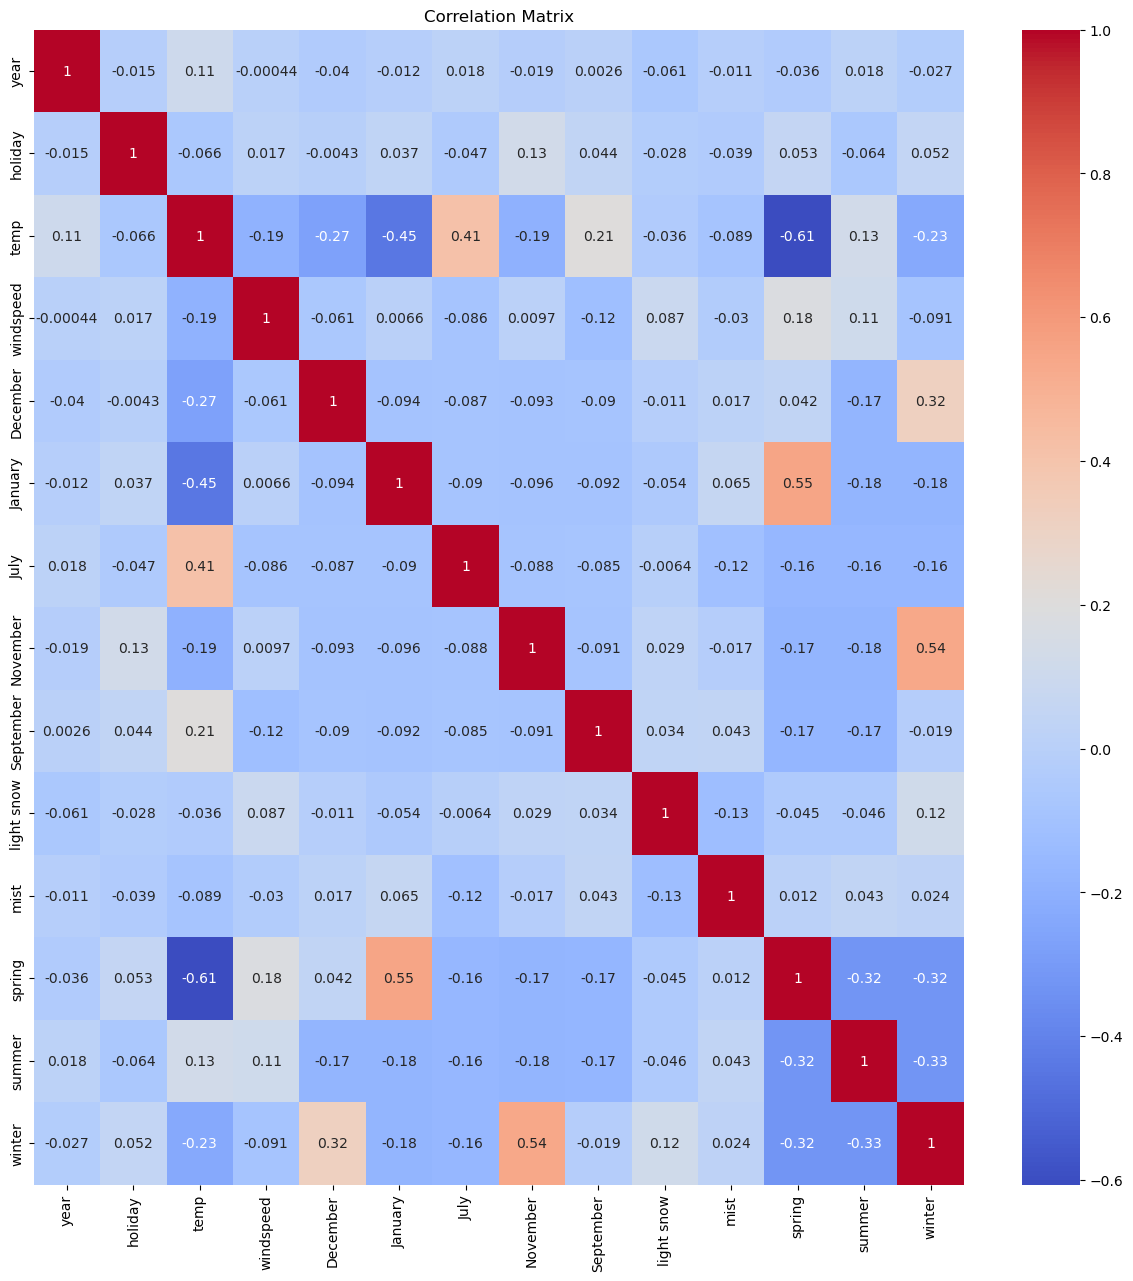

In [82]:
# Heatmap showing the correlation coefficients between the features in X_train_new and the target variable

plt.figure(figsize = (15,15))
correlation_matrix = X_train_new.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [83]:
# Building Model 2

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train, X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 15 May 2023   Prob (F-statistic):          4.75e-186
Time:                        14:59:17   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.0

In [84]:
# p-value for the "November" variable is high and statistically insignificant

X_train_new = X_train_new.drop(['November'], axis=1)

In [85]:
# calculate the VIF for new model
vif = calculateVIF(X_train_new)
print(vif)

      Features   VIF
2         temp  5.14
3    windspeed  4.62
10      spring  2.89
11      summer  2.24
0         year  2.07
12      winter  2.05
5      January  1.65
6         July  1.59
9         mist  1.57
7    September  1.34
4     December  1.29
8   light snow  1.08
1      holiday  1.04


In [86]:
# Building Model 3

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train, X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 15 May 2023   Prob (F-statistic):          2.74e-186
Time:                        15:15:23   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2283      0.031      7.310      0.0

In [87]:
# Dropping december variable as it has high p-value and a negative coefficient

X_train_new = X_train_new.drop(['December'], axis=1)

In [88]:
# calculate the VIF for new model
vif = calculateVIF(X_train_new)
print(vif)

      Features   VIF
2         temp  5.13
3    windspeed  4.62
9       spring  2.75
10      summer  2.24
0         year  2.07
11      winter  1.78
4      January  1.61
5         July  1.59
8         mist  1.56
6    September  1.34
7   light snow  1.08
1      holiday  1.04


In [89]:
# Building Model 4

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train, X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 15 May 2023   Prob (F-statistic):          8.14e-187
Time:                        15:19:02   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2154      0.030      7.088      0.0

In [90]:
# Dropping january variable as it has high p-value and a negative coefficient

X_train_new = X_train_new.drop(['January'], axis=1)

In [91]:
# calculate the VIF for new model
vif = calculateVIF(X_train_new)
print(vif)

      Features   VIF
2         temp  5.09
3    windspeed  4.60
9       summer  2.23
8       spring  2.08
0         year  2.07
10      winter  1.78
4         July  1.58
7         mist  1.55
5    September  1.34
6   light snow  1.08
1      holiday  1.04


In [92]:
# Building Model 5

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train, X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 15 May 2023   Prob (F-statistic):          5.06e-187
Time:                        15:22:48   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.0

In [93]:
# Dropping july variable as it has high p-value and a negative coefficient

X_train_new = X_train_new.drop(['July'], axis=1)

# calculate the VIF for new model
vif = calculateVIF(X_train_new)
print(vif)

     Features   VIF
3   windspeed  4.60
2        temp  3.84
0        year  2.07
7      spring  1.99
8      summer  1.90
9      winter  1.63
6        mist  1.55
4   September  1.23
5  light snow  1.08
1     holiday  1.04


In [94]:
# Building Model 6

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train, X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 15 May 2023   Prob (F-statistic):          1.47e-186
Time:                        15:25:31   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1909      0.030      6.447      0.0

In [95]:
# calculate the VIF for new model
vif = calculateVIF(X_train_new)
print(vif)

     Features   VIF
3   windspeed  4.60
2        temp  3.84
0        year  2.07
7      spring  1.99
8      summer  1.90
9      winter  1.63
6        mist  1.55
4   September  1.23
5  light snow  1.08
1     holiday  1.04


In [ ]:
# The current model shows good explanatory power with several statistically significant variables.
# The current model has an adjusted R-squared value of 0.829, indicating that it explains approximately 82.9% of the variability in the target variable.
# The model has a significant F-statistic (F-statistic: 248.4, Prob (F-statistic): 1.47e-186), suggesting that the overall model is statistically significant.

# Step 6: Residual Analysis

In [96]:
X_train_lm_6

,const,year,holiday,temp,windspeed,September,light snow,mist,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,1,0


In [97]:
# calculating the predicted values for the target variable (y) using lr_6 and the training data (X_train_lm_6)

y_train_pred = lr_6.predict(X_train_lm_6)

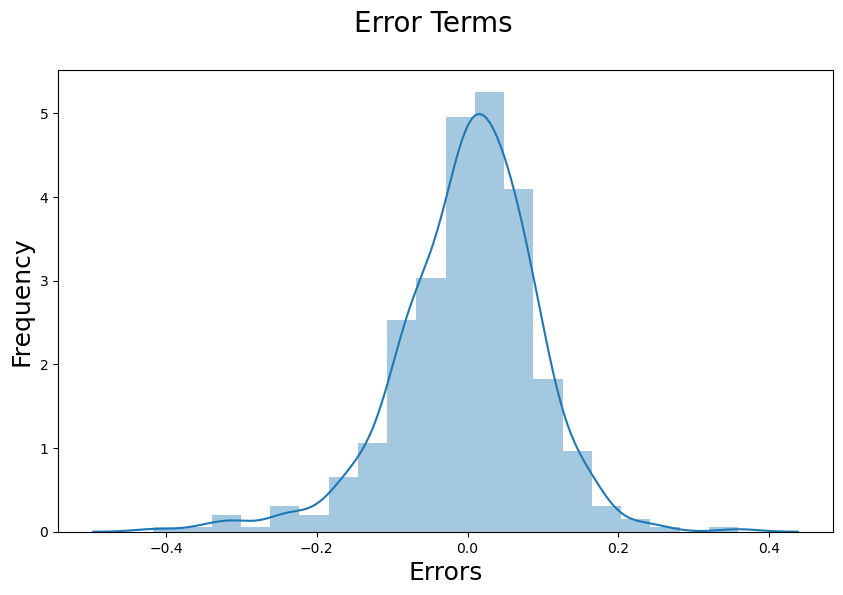

In [99]:
# Plot a histogram of the error terms

fig = plt.figure(figsize=(10, 6))
sns.distplot((y_train - y_train_pred), bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

In [100]:
# It suggests that the error terms are approximately normally distributed.

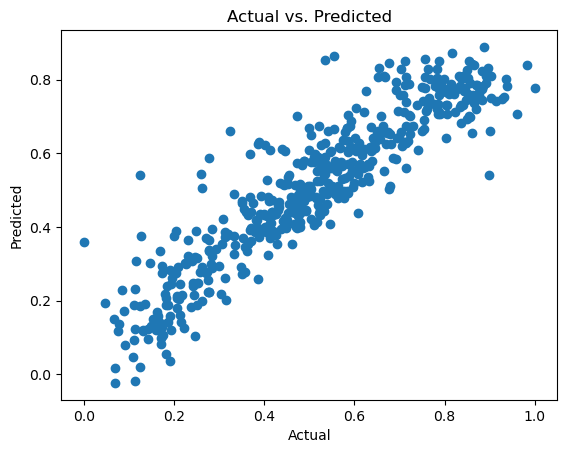

In [101]:
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [102]:
# It is indicating a close match between the actual and predicted values.

In [103]:
# Multicollinearity

vif = calculateVIF(X_train_new)
print(vif)

     Features   VIF
3   windspeed  4.60
2        temp  3.84
0        year  2.07
7      spring  1.99
8      summer  1.90
9      winter  1.63
6        mist  1.55
4   September  1.23
5  light snow  1.08
1     holiday  1.04


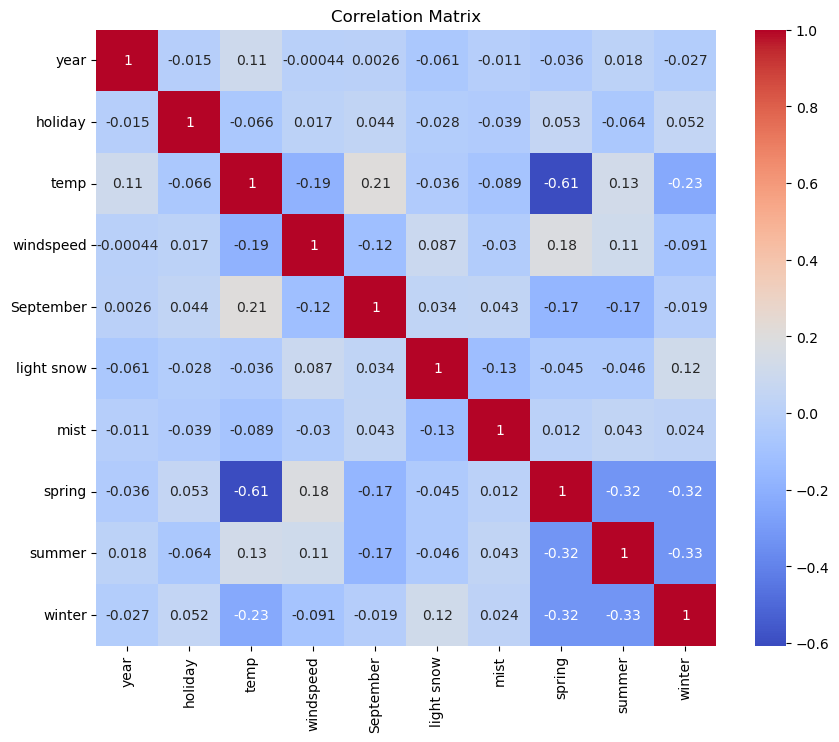

In [104]:
# Heatmap for the correlation matrix of X_train_new

correlation_matrix = X_train_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

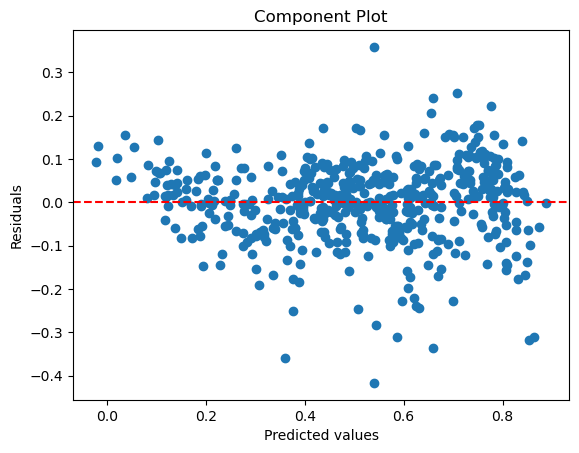

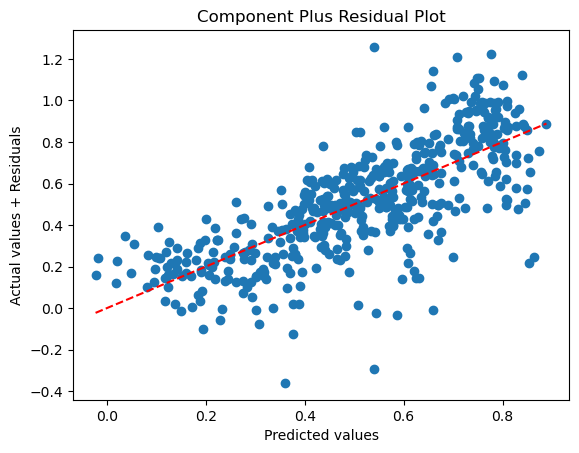

In [112]:
# Linearity Chec
# The component plot shows the relationship between the predicted values and the residuals
# The component plus residual plot shows the relationship between the predicted values and the actual values plus the residuals


# Calculate predicted values
y_train_pred = lr_6.predict(X_train_lm_6)

# Calculate residuals
residual = y_train - y_train_pred

# Component plot
plt.scatter(y_train_pred, residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Component Plot")
plt.show()

# Component plus residual plot
plt.scatter(y_train_pred, y_train + residual)
plt.plot([min(y_train_pred), max(y_train_pred)], [min(y_train_pred), max(y_train_pred)], color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Actual values + Residuals")
plt.title("Component Plus Residual Plot")
plt.show()

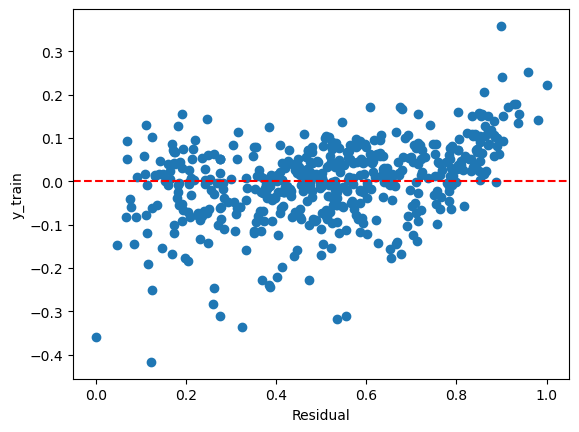

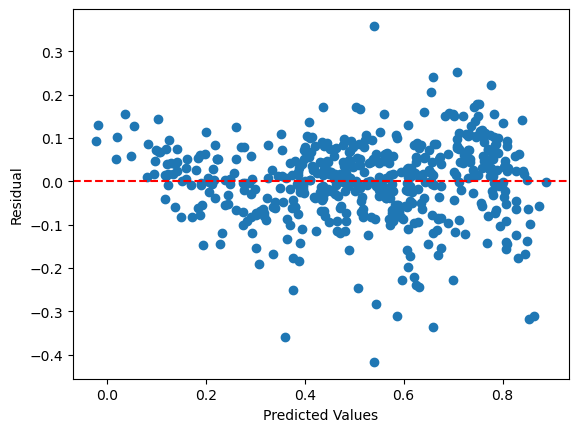

In [117]:
# Homoscedasticity

residual = y_train - y_train_pred

plt.scatter(y_train, residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()


residual = y_train - y_train_pred

plt.scatter(y_train_pred, residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Residual")
plt.xlabel("Predicted Values")
plt.show()

# Step 7: Making Predictions

In [119]:
# Scaling on specific numerical variables in the test dataset df_test

num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']
df_test.loc[:, num_vars] = scaler.transform(df_test.loc[:, num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,August,December,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,light snow,mist,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [120]:
# Separation of the target variable ('cnt') from the feature variables (X_test)

y_test = df_test.pop('cnt')
X_test = df_test

In [121]:
# assigns the column names of the X_train_new DataFrame to the variable col1
col1 = X_train_new.columns

# This line selects only the columns in X_test that are present in the col1
X_test = X_test[col1]

# Adding a constant column to the X_test
X_test_lm_6 = sm.add_constant(X_test)

In [122]:
# predicting the target variable (y_pred) using the trained linear regression model (lr_6) and the test data
y_pred = lr_6.predict(X_test_lm_6)

In [125]:
# Obtaining the R-squared score (r2) between the actual and predicted target values
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8038

# Step 8: Model Evaluation

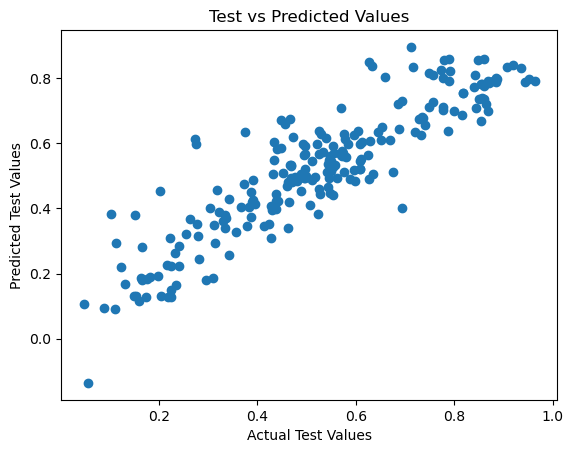

In [126]:
# Plot Test vs Predicted test

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Test Values")
plt.ylabel("Predicted Test Values")
plt.title("Test vs Predicted Values")
plt.show()

In [128]:
# Rounding the coefficients to improve readability and provide a concise representation of the model's parameters
round(lr_6.params,4)

const         0.1909
year          0.2341
holiday      -0.0963
temp          0.4777
windspeed    -0.1481
September     0.0910
light snow   -0.2850
mist         -0.0787
spring       -0.0554
summer        0.0621
winter        0.0945
dtype: float64

The equation of the best-fitted line in the multiple linear regression model can be expressed as:

cnt = 0.1909 + 0.2341 * year - 0.0963 * holiday + 0.4777 * temp - 0.1481 * windspeed + 0.0910 * September - 0.2850 * light snow - 0.0787 * mist - 0.0554 * spring + 0.0621 * summer + 0.0945 * winter

In this equation, each coefficient represents the estimated impact of the corresponding predictor variable on the target variable (cnt). For example, the coefficient of year (0.2341) indicates that for each unit increase in the year variable, the predicted cnt value increases by 0.2341 units, assuming all other variables are held constant.

In [130]:
# Calculating adjusted R-squared value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


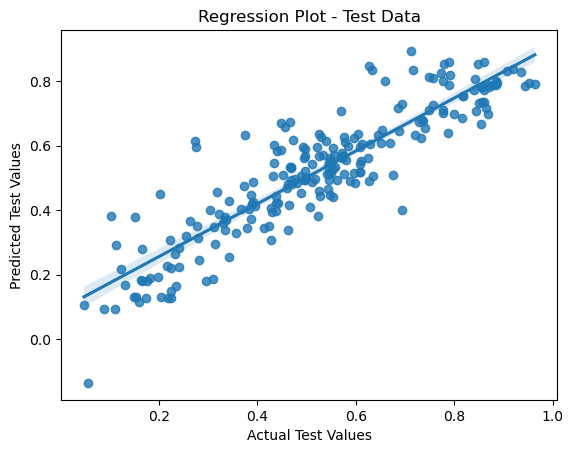

In [132]:
# Plotting the regression line on the test data
sns.regplot(y_test, y_pred)
plt.xlabel("Actual Test Values")
plt.ylabel("Predicted Test Values")
plt.title("Regression Plot - Test Data")
plt.show()

# Step 9: Evaluation and Interpretation of results

Key findings and interpretations:

1.The variables "temp," "year," "windspeed," "September," "light snow," "mist," "spring," "summer," and "winter" have shown statistically significant relationships with the bike rental counts.
2.The models have shown reasonably good performance in predicting the bike rental counts (cnt) with high R-squared values. The adjusted R-squared values for the test dataset indicate that the models explain a significant portion of the variance in the target variable.
3.The scatter plots of actual versus predicted values and component-plus-residual plots were used to assess the linearity assumption. The plots indicated a reasonably linear relationship between the predicted and actual values, suggesting that the model captures the linear patterns in the data to a satisfactory extent.
4.The final model exhibited a good overall fit on the test data, as evidenced by the scatter plot of actual versus predicted values. The majority of the points align close to the diagonal line, indicating that the model's predictions are relatively accurate.